In [63]:
import acquire
import prepare

In [64]:
import pandas as pd
import numpy as np

In [149]:
from acquire import get_telco_data

df_telco = pd.read_csv('df_telco.csv', index_col=0)
df_telco.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


In [150]:
#Adjusting df

pd.set_option('display.max_columns', 50)

In [151]:
df_telco.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


In [152]:
# Drop unneccessary columns

df_telco.columns

Index(['payment_type_id', 'contract_type_id', 'internet_service_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type', 'contract_type',
       'payment_type'],
      dtype='object')

In [153]:
df_telco = df_telco.drop(['payment_type_id', 'contract_type_id'], axis=1)

In [154]:
df_telco.head()
df_telco.shape

(7043, 22)

In [155]:
#Setting 'customer_id' as index

df_telco = df_telco.set_index(['customer_id'])
#df_telco = df_telco.set_index(['customer_id'])

In [156]:
#Setting 'churn' from Yes or No to 1 or 0

df_telco["Churn"] = df_telco["churn"].map({"Yes": 1, "No": 0})

In [157]:
#df_telco = df_telco.drop(['churn'], axis=1)
df_telco.head()
df_telco.shape

(7043, 22)

In [158]:
#Adjusting whitespace in 'internet_service_type' column to "None"

#df_telco.head()
#df_telco.internet_service_type.value_counts()
df_telco['internet_service_type'] = df_telco['internet_service_type'].fillna("None")

In [159]:
df_telco.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [96]:
#Checking missing values

#df_telco.isna().sum()

In [161]:
df_telco = df_telco.drop(['internet_service_type_id'], axis = 1)
#df_telco.shape

(7043, 21)

In [162]:
# Creating Baseline percentages for both the majority and minor class

df_telco.Churn.value_counts()

# Identify the minority class
# alt method: majority_class = df['target'].mode()[0]
minority_class = df_telco.Churn.unique()[1] 

# Calculate the baseline percentage
min_baseline_percentage = df_telco['Churn'].value_counts(normalize=True).get(minority_class, 1) * 100

# Create a baseline prediction column with the majority class
df_telco['baseline_prediction'] = minority_class

# Display the baseline percentage and the DataFrame with baseline prediction
print(f"Baseline Percentage: {min_baseline_percentage:.2f}%")
#print(data_telco)

Baseline Percentage: 26.54%


In [163]:
# Identify the majority class
# alt method: majority_class = df['target'].mode()[0]
majority_class = df_telco.Churn.unique()[0]

# Calculate the baseline percentage
maj_baseline_percentage = df_telco["Churn"].value_counts(normalize=True).get(majority_class, 0) * 100
# Create a baseline prediction column with the majority class
df_telco['baseline_prediction'] = majority_class

# Display the baseline percentage and the DataFrame with baseline prediction
print(f"Baseline Percentage: {maj_baseline_percentage:.2f}%")
#print(data_telco)

Baseline Percentage: 73.46%


In [164]:
# Changing 'Total_charges' from object to float type

# df_telco.dtypes

df_telco['Total_Charges'] = df_telco['total_charges'].replace(' ', np.nan)

In [165]:
df_telco['Total_Charges'] = df_telco.Total_Charges.astype(float)

In [166]:
df_telco.Total_Charges.dtype

dtype('float64')

In [171]:
df_telco = df_telco.drop(['total_charges'], axis=1)

In [174]:
#df_telco.head()
#df_telco.dtypes

In [ ]:
##MAybe input graph of tenure v monthly charges in this spot

In [175]:
#Encoding the object then incorporating back into the original dataframe

#Importing the models
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

In [177]:
#df_telco.select_dtypes(include='O').columns


In [178]:
#Encode and make Dataframe"

#df_telco.select_dtypes(include='O').columns


#Transform objects and strings into categorey
for label, content in df_telco.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_telco[label] = pd.Categorical(content)
        
#df_telco.dtypes 
#df_telco.select_dtypes(include='category').columns

# Encoding data using OneHotEncoder
labels = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn',
       'internet_service_type', 'contract_type', 'payment_type']  
categorical_data = df_telco[labels]  
ohe = OneHotEncoder(categories='auto')  
feature_arr = ohe .fit_transform(categorical_data).toarray()  
ohe_labels = ohe.get_feature_names_out(labels)
#ohe_labels = ohe.get_feature_names_out(categorical_data)

features = pd.DataFrame(feature_arr,columns=ohe_labels)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df_telco' is your DataFrame and 'labels' are the columns to be one-hot encoded
categorical_data = df_telco[labels].astype(str)  # Ensure data is of string type

# Initialize OneHotEncoder with handle_unknown='ignore' to handle unseen categories
ohe = OneHotEncoder(categories='auto', handle_unknown='ignore', sparse=False)

# Fit and transform the data
feature_arr = ohe.fit_transform(categorical_data)

# Get feature names
ohe_labels = ohe.get_feature_names_out(labels)

# Create DataFrame with one-hot encoded features
features = pd.DataFrame(feature_arr, columns=ohe_labels)

# Display the resulting DataFrame
print(features)


In [179]:
features.head()

,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,churn_No,churn_Yes,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [180]:
enc_df_telco = df_telco.join(features)
enc_df_telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,churn,internet_service_type,contract_type,payment_type,Churn,baseline_prediction,Total_Charges,gender_Female,gender_Male,partner_No,...,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,churn_No,churn_Yes,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,No,DSL,One year,Mailed check,0,0,593.30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,No,DSL,Month-to-month,Mailed check,0,0,542.40,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,Yes,Fiber optic,Month-to-month,Electronic check,1,0,280.85,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,Yes,Fiber optic,Month-to-month,Electronic check,1,0,1237.85,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,Yes,Fiber optic,Month-to-month,Mailed check,1,0,267.40,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
enc_df_telco.shape

(7043, 65)

In [182]:
features.shape

(7043, 43)

In [183]:
df_telco.shape

(7043, 22)

In [216]:
#Drop original columns from joined dataframe

enc_df_telco = enc_df_telco.drop(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn',
       'internet_service_type', 'contract_type', 'payment_type'], axis=1)

In [219]:
#enc_df_telco.dtypes

In [187]:
from sklearn.model_selection import train_test_split

In [ ]:
#Split the data into train, validate, and test sets using function from prepare import



In [220]:
def train_test_validate2(df, test_size=(0.2, 0.5), random_state=123):
    train, test = train_test_split(df, test_size=test_size[0], random_state=random_state)
    train_validate, test_validate = train_test_split(train, test_size=test_size[1], random_state=random_state)
    
    return train, test, train_validate, test_validate

In [221]:
train, test, train_validate, test_validate = train_test_validate2(enc_df_telco)

In [222]:
train.shape

(5634, 49)

In [ ]:
#Alt method

#Creating DF from results:
# Create DataFrames from the results
train_df = pd.DataFrame(train, columns=df.columns)
validate_df = pd.DataFrame(validate, columns=df.columns)
test_df = pd.DataFrame(test, columns=df.columns)

In [195]:
#Assigning X, y values to independent and dependent variables

X = train.drop(['Churn'], axis=1)
y = train['Churn']

In [223]:
X_train2 = train.drop(['Churn'], axis=1)
X_test2 = test.drop(['Churn'], axis=1)

In [224]:
X_train2.shape

(5634, 48)

In [287]:
y_train = train['Churn']
y_test = test['Churn']

In [288]:
y_test.shape

(1409,)

In [190]:
#Below block displays both ways

In [ ]:
X = validate.drop(['survived'], axis=1)
y = validate['survived']

#Split from prepare.py results
X_train2 = train.drop(['Churn'], axis=1)
X_test2 = test.drop(['Churn'], axis=1)
#------------------------------------------------------------------
#Alt method: from sklearn.model_selection import train_test_split

# Assuming 'train' and 'validate' are your DataFrames
X_train, X_test, y_train, y_test = train_test_split(train.drop('target_column', axis=1), train['target_column'], test_size=0.2, random_state=42)
X_train_validate, X_test_validate, y_train_validate, y_test_validate = train_test_split(validate.drop('target_column', axis=1), validate['target_column'], test_size=0.5, random_state=42)

# Now X_train, X_test, y_train, and y_test are your training and testing sets for 'train' data
# Similarly, X_train_validate, X_test_validate, y_train_validate, and y_test_validate are for 'validate' data


In [228]:
X_train2.head()

,senior_citizen,tenure,monthly_charges,baseline_prediction,Total_Charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,churn_No,churn_Yes,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9824-BEMCV,0,17,69.00,0,1149.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7398-LXGYX,0,44,84.80,0,3626.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8225-BTJAU,1,10,79.25,0,793.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5099-BAILX,1,43,110.75,0,4687.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5862-BRIXZ,0,46,60.75,0,2893.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
# Scaling data and fitting model to data

#Importing the appropiate models

#Import models
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [227]:
#Standard Scaler
scaler = StandardScaler()

train_scale_X_train = scaler.fit_transform(X_train2)
test_scale_X_test = scaler.fit_transform(X_test2)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/e

In [230]:
train_scale_X_train

array([[-0.4377492 , -0.6296983 ,  0.13998632, ...,         nan,
                nan,         nan],
       [-0.4377492 ,  0.47144489,  0.66731575, ...,         nan,
                nan,         nan],
       [ 2.28441306, -0.91517986,  0.48208294, ...,         nan,
                nan,         nan],
       ...,
       [-0.4377492 , -1.28222759, -1.47871478, ...,         nan,
                nan,         nan],
       [-0.4377492 ,  0.10439716, -1.31350714, ...,         nan,
                nan,         nan],
       [-0.4377492 ,  1.2871065 ,  1.32981506, ...,         nan,
                nan,         nan]])

In [231]:
test_scale_X_test = scaler.fit_transform(X_test2)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [259]:
X_train3 = X_train2.fillna(0)



In [ ]:
labels = ['senior_citizen', 'tenure', 'monthly_charges', 'baseline_prediction',
       'Total_Charges', 'gender_Female', 'gender_Male', 'partner_No',
       'partner_Yes', 'dependents_No', 'dependents_Yes', 'phone_service_No',
       'phone_service_Yes', 'multiple_lines_No',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'paperless_billing_No', 'paperless_billing_Yes', 'churn_No',
       'churn_Yes', 'internet_service_type_DSL',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'contract_type_Month-to-month', 'contract_type_One year',
       'contract_type_Two year', 'payment_type_Bank transfer (automatic)',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check']  
categorical_data = X_train2[labels]  
#ohe = OneHotEncoder(categories='auto')  
#feature_arr = ohe .fit_transform(categorical_data).toarray()  
ohe_labels = ohe.get_feature_names_out(labels)  
features = pd.DataFrame(X_train2,columns=ohe_labels)

In [256]:


# Create a DataFrame from the scaled data with appropriate column labels
X_scaled_df = pd.DataFrame(train_scale_X_train, columns=X_train2.columns)

# Display the DataFrame
#print(X_scaled_df)
X_scaled_df

,senior_citizen,tenure,monthly_charges,baseline_prediction,Total_Charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,churn_No,churn_Yes,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,-0.437749,-0.629698,0.139986,0.0,-0.503417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.437749,0.471445,0.667316,0.0,0.592335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.284413,-0.915180,0.482083,0.0,-0.660964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.284413,0.430662,1.533404,0.0,1.061990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.437749,0.553011,-0.135360,0.0,0.268060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,-0.437749,-1.159878,0.328557,0.0,-0.878703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5630,-0.437749,0.675360,-0.315586,0.0,0.153273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5631,-0.437749,-1.282228,-1.478715,0.0,-1.002980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5632,-0.437749,0.104397,-1.313507,0.0,-0.654018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_scaled_df.fillna(0)

In [ ]:
X_3 = X_scaled_df

In [ ]:
#X_4 = X_3.fillna(0)
X_4.head()

In [277]:


# Create a DataFrame from the scaled data with appropriate column labels
X_scaled_df_test = pd.DataFrame(test_scale_X_test, columns=X_train2.columns)

# Display the DataFrame
#print(X_scaled_df)
X_scaled_df_test

,senior_citizen,tenure,monthly_charges,baseline_prediction,Total_Charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,churn_No,churn_Yes,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,-0.448546,-0.368130,-1.119386,0.0,-0.692818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.448546,0.927090,-1.479047,0.0,-0.485765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.448546,-0.894313,-0.118877,0.0,-0.714287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.448546,-1.258593,0.363395,0.0,-0.955965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.229426,-1.056215,0.530147,0.0,-0.789537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,-0.448546,0.441382,1.135030,0.0,0.848056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1405,-0.448546,-0.691935,0.644584,0.0,-0.418064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1406,-0.448546,0.846138,0.167217,0.0,0.619447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1407,-0.448546,-0.934788,-0.681255,0.0,-0.811966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
X_scaled_X_test = X_scaled_df_test.fillna(0)

In [249]:
svc = SVC()

In [273]:
svc.fit(X_4, y_train)

SVC()

In [280]:
X_4.shape

(5634, 48)

In [281]:
X_scaled_X_test.shape

(1409, 48)

In [283]:
y_train.shape

(5634,)

In [284]:
y_test.shape

(5634,)

In [286]:
svc.score(X_4, y_train)

0.7925097621583245

In [ ]:
X_scaled_X_test = X_scaled_df_test.fillna(0)

In [ ]:
#Score using model

In [299]:
svc.score(X_scaled_X_test, y_test)

0.7877927608232789

In [ ]:
#y_pred

In [307]:
y_pred = svc.predict(X_scaled_df_test.fillna(0))
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Accuracy score

In [311]:
accuracy_score(y_test, y_pred)

print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_pred):.4f}")


ACCURACY SCORE:
0.7878


In [313]:
from sklearn.metrics import classification_report

In [318]:
#Classification report

classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1032
           1       0.68      0.39      0.50       377

    accuracy                           0.79      1409
   macro avg       0.74      0.66      0.68      1409
weighted avg       0.77      0.79      0.77      1409



In [320]:
X_scaled_X_test.head()

,senior_citizen,tenure,monthly_charges,baseline_prediction,Total_Charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,churn_No,churn_Yes,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,-0.448546,-0.368130,-1.119386,0.0,-0.692818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.448546,0.927090,-1.479047,0.0,-0.485765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.448546,-0.894313,-0.118877,0.0,-0.714287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.448546,-1.258593,0.363395,0.0,-0.955965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.229426,-1.056215,0.530147,0.0,-0.789537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [322]:
X_4.head()

,senior_citizen,tenure,monthly_charges,baseline_prediction,Total_Charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,churn_No,churn_Yes,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,-0.437749,-0.629698,0.139986,0.0,-0.503417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.437749,0.471445,0.667316,0.0,0.592335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.284413,-0.915180,0.482083,0.0,-0.660964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.284413,0.430662,1.533404,0.0,1.061990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.437749,0.553011,-0.135360,0.0,0.268060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [331]:
# Train SVC model with probability=True
svc2 = SVC(probability=True)
svc2.fit(X_4, y_train)

SVC(probability=True)

In [ ]:
labels = ['senior_citizen', 'tenure', 'monthly_charges', 'baseline_prediction',
       'Total_Charges', 'gender_Female', 'gender_Male', 'partner_No',
       'partner_Yes', 'dependents_No', 'dependents_Yes', 'phone_service_No',
       'phone_service_Yes', 'multiple_lines_No',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'paperless_billing_No', 'paperless_billing_Yes', 'churn_No',
       'churn_Yes', 'internet_service_type_DSL',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'contract_type_Month-to-month', 'contract_type_One year',
       'contract_type_Two year', 'payment_type_Bank transfer (automatic)',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check']  
categorical_data = X_train2[labels]  
ohe = OneHotEncoder(categories='auto')  
feature_arr = ohe .fit_transform(categorical_data).toarray()  
ohe_labels = ohe.get_feature_names_out(labels)  
features = pd.DataFrame(feature_arr,columns=ohe_labels)

In [ ]:
#Maybe or JUST KEEP SCALED DATA TEST DF

# Create a DataFrame from the svc usinf same techniques as scaled data data with appropriate column labels
X_scaled_df_test = pd.DataFrame(test_scale_X_test, columns=X_train2.columns)

# Display the DataFrame
#print(X_scaled_df)
X_scaled_df_test

In [332]:
# Use predict_proba on the scaled testing data
y_proba = svc2.predict_proba(X_scaled_X_test)

# Display the predicted probabilities
print(y_proba)

[[0.84722274 0.15277726]
 [0.84840883 0.15159117]
 [0.78447725 0.21552275]
 ...
 [0.83584991 0.16415009]
 [0.84018853 0.15981147]
 [0.83487553 0.16512447]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.771


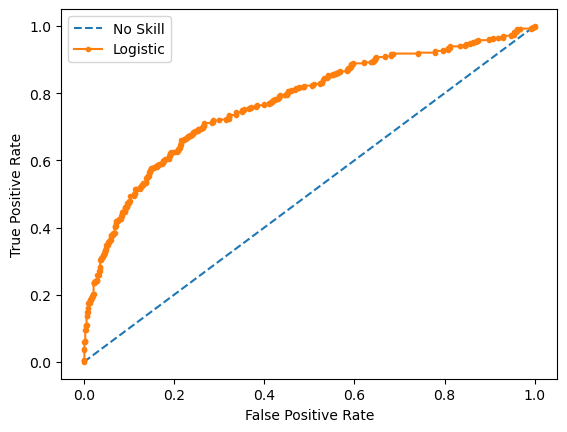

In [333]:
import matplotlib.pyplot as plt
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
# Train SVC model with probability=True
#svc2 = SVC(probability=True)
#svc2.fit(X_4, y_train)# predict probabilities
y_proba = svc2.predict_proba(X_scaled_X_test)

# keep probabilities for the positive outcome only
lr_probs = y_proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [338]:
param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 80, 90, 100,],
    'gamma':[1, 0.1, 0.01, 0.001, 0.050],
    'kernel':['rbf']
}

grid_cv = GridSearchCV(SVC(), param_grid, verbose=1, cv=5, n_jobs=-1)
grid_cv.fit(X_4, y_train)

best_params = grid_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters: {'C': 90, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
#poss other params: ['Polynomial', 'RBF', 'Sigmoid'], 

# param_grid = {'C': [0.1,1, 10, 100, .001], 'gamma': [1,0.1,0.01,0.001, 0.5],'kernel': ['rbf', 'poly', 'sigmoid']}

In [335]:
svm_clf = SVC(**best_params)
svm_clf.fit(X_4, y_train)


SVC(C=100, gamma=0.001)

In [336]:
svm_clf.score(X_scaled_X_test, y_test)  #Increase

0.7892122072391767

In [340]:
svc_clf2 = SVC(**best_params)
svc_clf2.fit(X_4, y_train)


SVC(C=90, gamma=0.001)

In [341]:
svc_clf2.score(X_scaled_X_test, y_test)  #Increase of 0.001410

0.7892122072391767

In [ ]:
#Creating Dataframe from rsults after modeling and y_pred

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming X and y are your features and target variable
# Replace this with your actual data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have trained a model (Logistic Regression in this case)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Create DataFrames for X_test, y_true, and y_pred
X_test_df = pd.DataFrame(X_test, columns=X.columns)  # Assuming X has column names
y_true_df = pd.DataFrame({'y_true': y_test})
y_pred_df = pd.DataFrame({'y_pred': y_pred})

# Concatenate the DataFrames horizontally
result_df = pd.concat([X_test_df, y_true_df, y_pred_df], axis=1)

# Display the result DataFrame
print(result_df)


#Then fit ensemble method to resulting df

In [ ]:
#Alt method

#Creating DF from results:
# Create DataFrames from the results
train_df = pd.DataFrame(train, columns=df.columns)
validate_df = pd.DataFrame(validate, columns=df.columns)
test_df = pd.DataFrame(test, columns=df.columns)

In [ ]:
#Still work in progress

In [303]:
#Function to be applied for above models after score:
def evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    clf_report = print(classification_report(y_train, y_train_pred))

    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [304]:
evaluate(SVC, X_4, X_scaled_df_test.fillna(0), y_train, y_test)

AttributeError: 'DataFrame' object has no attribute '_validate_params'

In [301]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Function to be applied for above models after scoring
def evaluate(model, X_train, X_test, y_train, y_test):
    # Training set evaluation
    y_train_pred = model.predict(X_train)

    print("TRAINING RESULTS: \n===============================")
    clf_report_train = classification_report(y_train, y_train_pred, output_dict=True)
    print(pd.DataFrame(clf_report_train))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")

    # Testing set evaluation
    y_test_pred = model.predict(X_test)

    print("\nTESTING RESULTS: \n===============================")
    clf_report_test = classification_report(y_test, y_test_pred, output_dict=True)
    print(pd.DataFrame(clf_report_test))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")

# Example usage:
# evaluate(model, X_train, X_test, y_train, y_test)


In [242]:
#Alt version of above function:

"""
    Evaluate a classification model on training and testing data.
    Thsi will display class_report, accuracy score, and 

    Parameters:
    - model: The classification model to evaluate.
    - X_train, X_test: The feature sets for training and testing.
    - y_train, y_test: The target values for training and testing.
    """

#Function to be applied for above models:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    y_train_predict_proba = model.predict_proba(X_train)[:, 1]
    y_test_predict_proba = model.predict_proba(X_test)[:, 1]

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    clf_report = print(classification_report(y_train, y_train_pred))

    print(f"CONFUSION MATRIX: {confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_train, y_train_pred):.3f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print(f"ROC_AUC_SCORE (PROBABILITIES OF CLASS '1': {roc_auc_score(y_true, y_test_predict_proba)}")


    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    clf_report = print(classification_report(y_train, y_train_pred))

    print(f"CONFUSION MATRIX: {confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.3f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print(f"ROC_AUC_SCORE (PROBABILITIES OF CLASS '1': {roc_auc_score(y_true, y_test_predict_proba)}")
    

In [243]:
evaluate_model(SVC, train_scale_X_train, test_scale_X_test, y_train, y_test)

TypeError: BaseSVC.predict() missing 1 required positional argument: 'X'

In [ ]:
# Assuming 'y_train' and 'y_test' are your target variables

# Convert to binary if it's not already
y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

# Then, use 'y_train_binary' and 'y_test_binary' in your model
svc.fit(X_train, y_train_binary)
score = svc.score(X_scaled_df_test2, y_test_binary)
print("Accuracy:", score)


In [ ]:
# Assuming 'cros_score' is your variable
cros_score = 3.14159  # Replace this with your actual value

rounded_score = round(cros_score, 2)
print(f'{rounded_score:.2f}')


In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming 'X_test' is your testing data and 'xgb' is your trained XGBoost model
explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(X_test)

# Choose a specific cohort (3 in this case) and calculate mean absolute values
shap_values_cohort = shap_values.cohorts(3).abs.mean(0)

# Create a SHAP bar plot
fig, ax = plt.subplots(1, 1)
shap.summary_plot(shap_values_cohort, X_test, plot_type="bar", show=False, max_display=10)  # Adjust max_display as needed
fig.legend(loc='upper left')

plt.show()


In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming 'X_test' is your testing data and 'xgb' is your trained XGBoost model
explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(X_test)

# Choose a specific cohort (3 in this case) and calculate mean absolute values
shap_values_cohort = shap_values.cohorts(3).abs.mean(0)

# Create a SHAP bar plot
fig, ax = plt.subplots(1, 1)
shap.summary_plot(shap_values_cohort, X_test, plot_type="bar", show=False, max_display=10)  # Adjust max_display as needed

# Move the legend to the left
fig.legend(loc='upper left')

plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)


In [ ]:
By strategically categorizing our customer data into three distinct cohorts, we gained valuable insights into the nuanced interplay of various features. The cohorts are defined as follows:

Group 1: Customers with a tenure of less than 22.5 months.
Group 2: Customers with a tenure of more than 22.5 months and committed to a contract of 2 years or more.
Group 3: Customers with a tenure of more than 22.5 months but with a contract duration of less than 2 years.
Analyzing these cohorts revealed intriguing patterns, particularly in Group 1. Customers with shorter tenure, likely representing a younger demographic, seem to prioritize features such as security, backup, tech support, and other online services over contract type and monthly charges. In today's mobile-centric landscape, the emphasis on security and functionality becomes increasingly crucial.

The second hypothesis explored the relationship between churn and tenure, and this relationship is most pronounced in Group 3. This group comprises customers with the highest tenure and the longest contract types. Notably, both tenure and contract type (2 years or more) exhibit significant influence within this cohort, indicating a strong correlation between customer loyalty, extended commitment, and overall satisfaction.

These findings provide actionable insights for our strategic planning and customer retention efforts, highlighting the importance of tailoring our services to meet the distinct preferences of different customer segments."

This can be broken down even further when we take out the variable of tenure and focus on the degree of weight factors such as security/backup (items dealing with functionality and dependability). From the image the level of tenure has been altered to where majority of customers fall within the same categorey, leaving room for other features to show their impact of importance. I have also included both single and relationship types. Although tenure still holds the greatest influence, total charges become less impactful as the other fatures to include ("online_security_Yes", "device_protection_Yes", "tech_support_Yes", and "online_backup_Yes") values increase. This also supports our feature importance bar chart displaying the rating of significance. This could imply that customers are more concerned with the technical help and security their decvice and the providing company offer. Implying that consumers are willing to not only stay longer with a company that offers these servciesm but are not oppossed to pay more if need be, therefore also increasing profits as well as detering churn.

In [ ]:
· Customers using online security and online backup services have relatively lower churn rates, indicating the value of these services.

· New customers are more prone to churn than long-term ones. Churn rates decrease as the tenure of customers increase.




To reduce the churn rate, a company should:
· Place emphasis on tailored retention strategies for younger customers, considering their unique preferences and needs.
· Develop targeted offers and services that address the needs of younger customers without partners or dependents, potentially through bundle packages or personalized plans.
· Offer incentives to encourage customers to commit to longer-term contracts, such as discounts or additional services.
· Highlight the benefits of online security and backup services to all customers to potentially reduce churn.


In [ ]:
Things to change moving forward:
* Collect data regarding tower overage within different customer demographics

*Collect data on the type of usage for the device
*Collect data on customer income based on geolocation/zip code



Finding satements:
- As businesses move more and more of their operations onto the cloud, cloud security has become an essential concern. Not only does cloud security help to protect data from external threats, but it also helps to reduce churn within businesses.

- security backup practices lead to increased client satisfaction and loyalty. By providing reliable security services, a company can foster long-term relationships with their clients and reduce client churn.

